In [ ]:
from IPython.display import HTML, display
HTML("""<style>
th {
background-color:#fcbdda;
}
td {
background-color:#fce3ef;
}
</style>""")

***

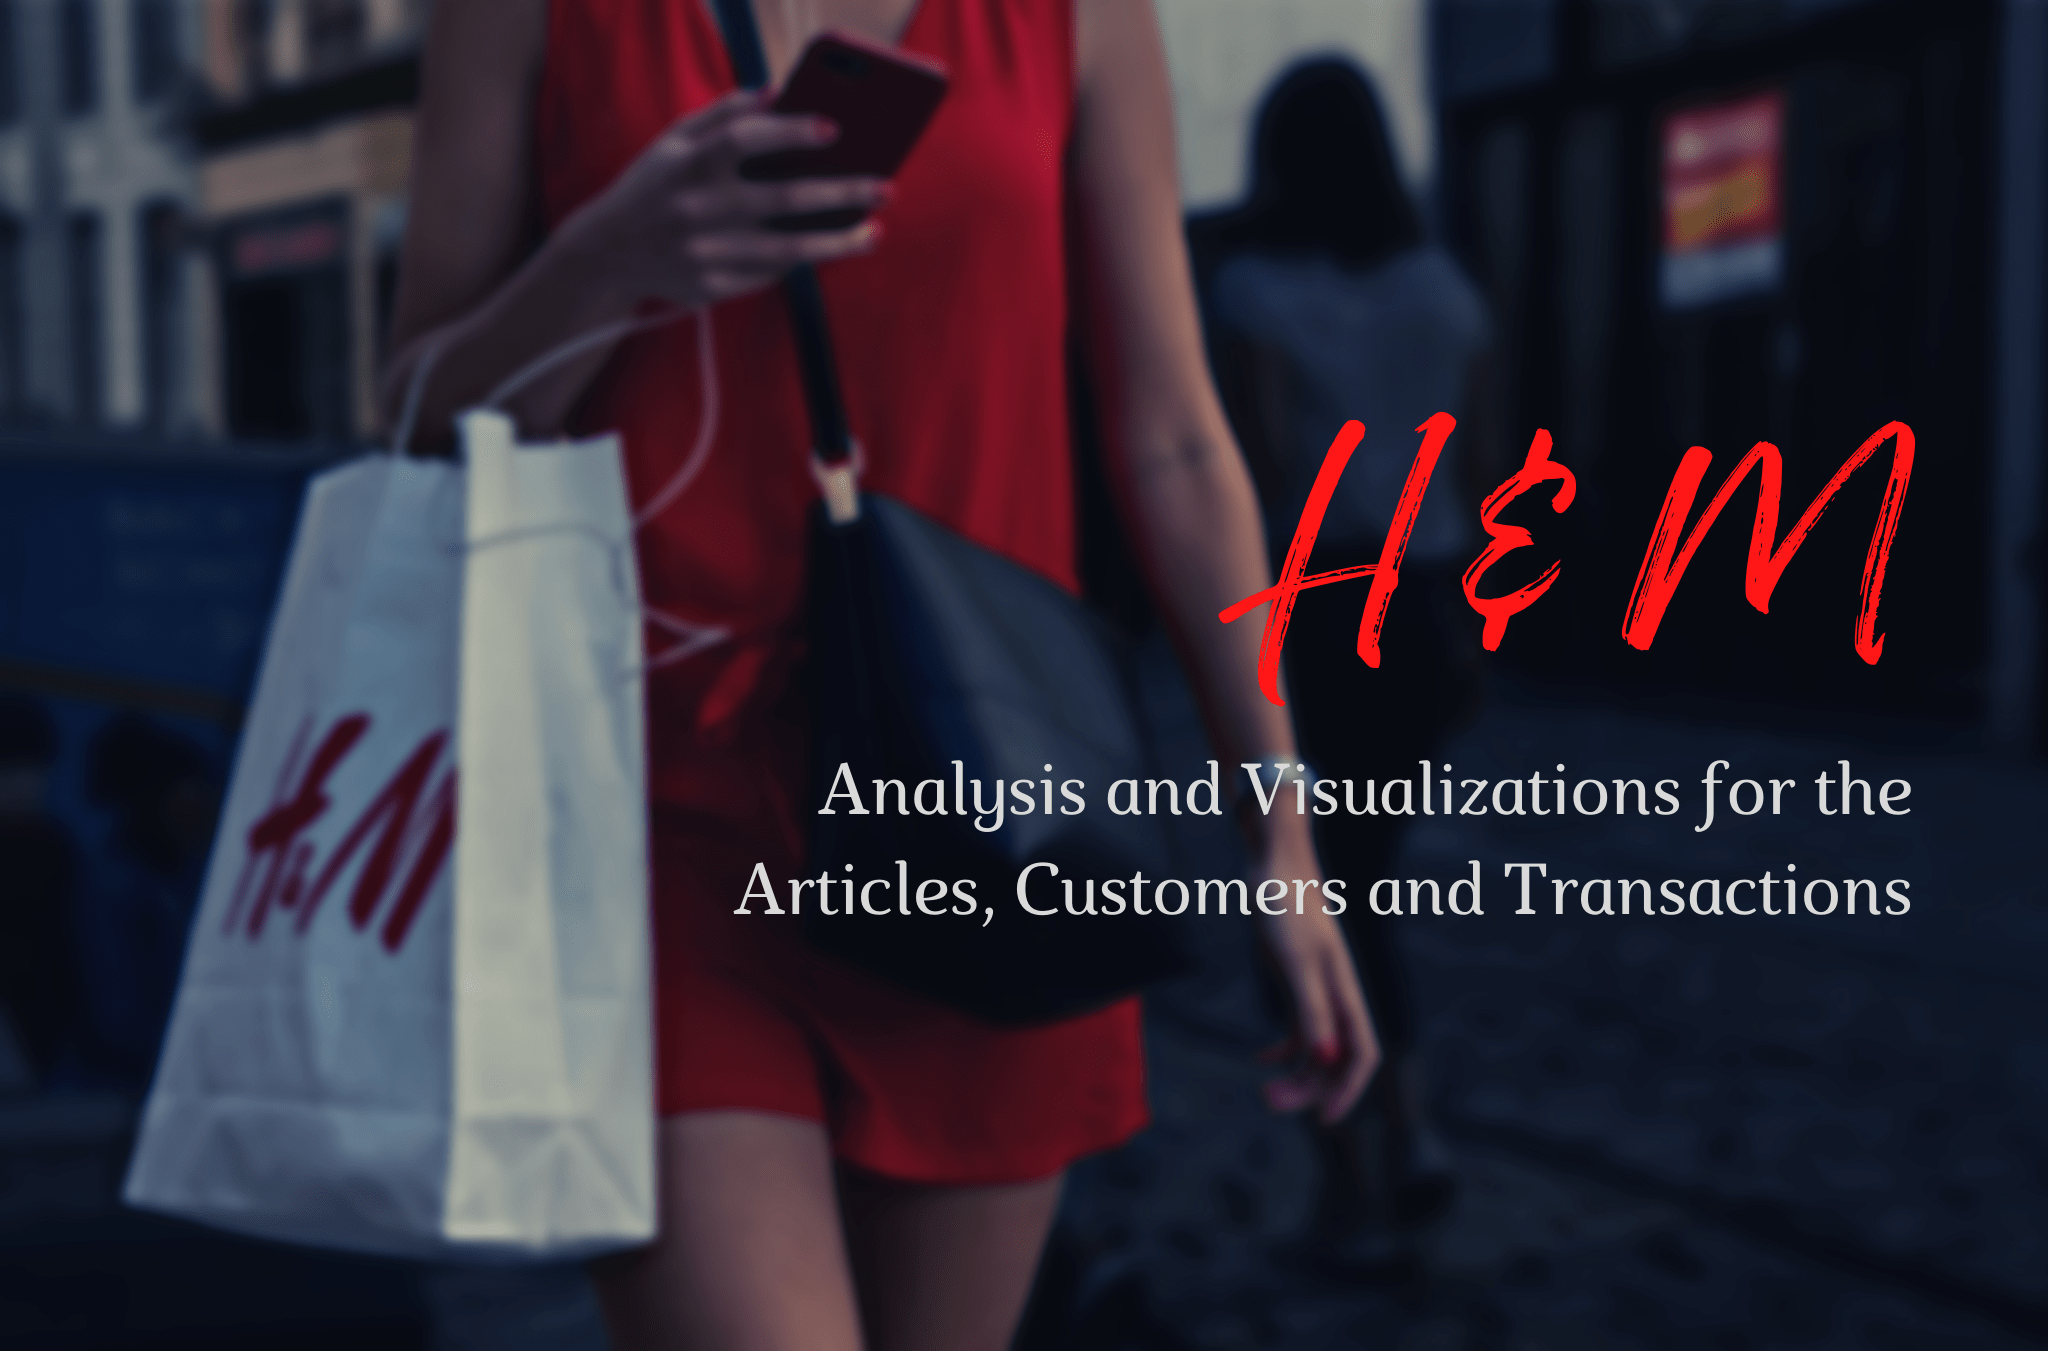

***

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Forward</h1>
<p style="font-size:18px; font-family:times new roman; line-height: 1.7em">
    Hi there 👋<br>
    This notebook is built with my interest in Fashion (yeah that's right. I'm a fashion freak 👦). This is an analysis on products by H&M, their customers, and overall transactions.<br>
    This Analysis is made with my passion for Data Science. If you find this notebook interesting, please give an upvote ⬆️. Thank you!💜
</p>

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Methodology</h1>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    Few weeks back, I built a <a href="https://www.kaggle.com/code/infinator/welcome-to-the-world-of-anime">notebook on some anime dataset</a> which improved my skills on Data Visualization with Plotly Express, then I got into the Kaggle's TPS March Competition where I learnt about some Machine Learning techniques. So basically I haven't touched Plotly since Feb:) Which is why I decided to polish my <b>Plotly Graph Objects</b> skills through this Notebook.<br>
    Through this, I've analyzed bout-
</p>
<ul style="font-size:15px; font-family:verdana; line-height: 1.7em">
    <li>Different categories of products</li>
    <li>The customers of H&M</li>
    <li>Transactions from the data</li>
</ul>

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Libraries and Settings</h1>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    <b>Major tools/libraries used :</b> Pandas, Plotly, Seaborn, WordCloud
</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    <b>Colour Pattern :</b>
</p>

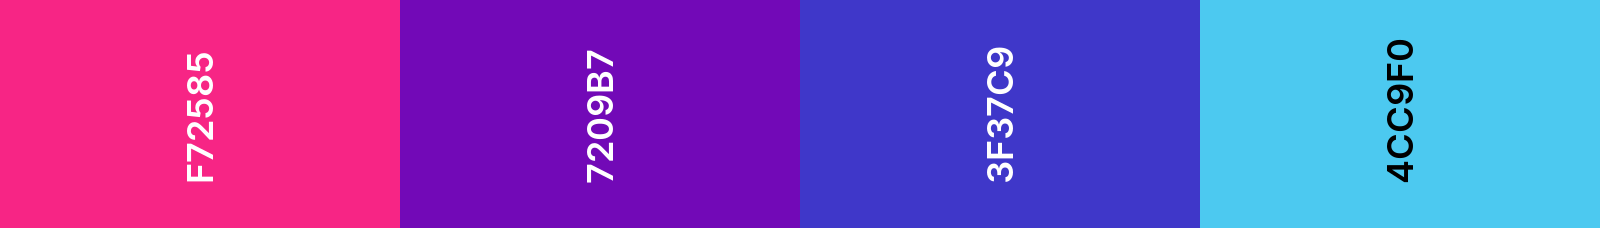

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
from termcolor import colored
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
pio.templates.default = "simple_white"
graph_font = "Franklin Gothic"
heading_font = "Brush Script MT, Brush Script Std, cursive"
normal_font = "Brush Script MT, Brush Script Std"
gradient = ["f72585","b5179e","7209b7","560bad","480ca8","3a0ca3","3f37c9","4361ee","4895ef","4cc9f0"]
pinks = ["#f72585", "#f966a9", "#fcbdda"]
violets = ["#7209b7", "#9a37db", "#d799ff", "#edd1ff"]
blues = ["#3f37c9", "#756fd6", "#a7a3f0", "#d1cfff"]
light_blues = ["#4cc9f0", "#93def6", "#c9eefa", "#ebfaff"]
gradient_with_hash = ["#" + i for i in gradient]
palette = px.colors.qualitative.Pastel
palette_r = px.colors.qualitative.Pastel_r
set1 = px.colors.qualitative.Set1
set2 = px.colors.qualitative.Set2
set3 = px.colors.qualitative.Set3
warnings.filterwarnings('ignore')

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Viz for the Articles Dataset</h1>

In [ ]:
#============ Reading the dataset ============
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
articles.head()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Product Groups and Types</h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    There are different groups of products and within those groups, there are different types.<br>
    Here is a visualization summarizing the different categories of products :
</p>

In [ ]:
fig = make_subplots(
    subplot_titles=["Product Groups", "", "Type : Garment Upper Body", "Type : Garment Lower Body", "Type : Garment Full Body", "Type : Accessories"],
    rows=3, cols=2,
    column_widths=[0.5, 0.5],
    specs=[[{"type": "bar", "colspan": 2}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    vertical_spacing = 0.15,
    horizontal_spacing = 0.25
)

l = articles.product_group_name.value_counts(sort=True).drop("Unknown").head(9)

fig.add_trace(go.Bar(x=list(l.index),
                        y=l,
                        marker = dict(color = ["#"+gradient[0], "#"+gradient[2], "#"+gradient[6], "#"+gradient[9]] + [palette_r[0] for i in range(5)]),
                    ),
              row=1, col=1
             )

fig.add_trace(go.Bar(x=articles[articles.product_group_name == "Garment Upper body"].product_type_name.value_counts(),
                        y=list(articles[articles.product_group_name == "Garment Upper body"].product_type_name.value_counts().index),
                        marker = dict(color = (["#"+gradient[0]] * 2) + (["#f966a9"] * 3) + (["#fcbdda"] * 10)),
                        orientation='h',
                    ),
              row=2, col=1
             )

fig.add_trace(go.Bar(y=list(articles[articles.product_group_name == "Garment Lower body"].product_type_name.value_counts().index),
                        x=articles[articles.product_group_name == "Garment Lower body"].product_type_name.value_counts(),
                        orientation='h',
                        marker = dict(color = (["#"+gradient[2]] * 1) + ["#9c52cc"] * 4),
                    ),
              row=2, col=2
             )

fig.add_trace(go.Bar(y=list(articles[articles.product_group_name == "Garment Full body"].product_type_name.value_counts().index),
                        x=articles[articles.product_group_name == "Garment Full body"].product_type_name.value_counts(),
                        orientation='h',
                        marker = dict(color = ["#"+gradient[6]] + ["#7873d9"] * 5),
                    ),
              row=3, col=1
             )

fig.add_trace(go.Bar(y=list(articles[articles.product_group_name == "Accessories"].product_type_name.value_counts().index),
                        x=articles[articles.product_group_name == "Accessories"].product_type_name.value_counts(),
                        orientation='h',
                        marker = dict(color = (["#"+gradient[9]] * 6) + (["#c9eefa"] * 40)),
                    ),
              row=3, col=2
             )

fig.update_layout(#title = "Groups and Subgroups of the Articles",
                  height = 1400,
                  #width = 1500, 
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 16,
                            family = graph_font),
                  showlegend = False,
                  #yaxis={"visible":False},
                  #template='ggplot2', 
                  legend=dict(
                                 bgcolor=palette_r[0],
                                 bordercolor="grey",
                                 borderwidth=1
                             )
                 )

fig.update_layout(yaxis3 = dict({'categoryorder':'total ascending'}),
                  yaxis4 = dict({'categoryorder':'total ascending'}),
                  yaxis5 = dict({'categoryorder':'total ascending'}),
                  yaxis6 = dict({'categoryorder':'total ascending'})
                 )

fig.layout.annotations[1].update(font = dict(size = 20))
fig.layout.annotations[0].update(font = dict(size = 20))
fig.layout.annotations[2].update(font = dict(size = 20))
fig.layout.annotations[3].update(font = dict(size = 20))
fig.layout.annotations[4].update(font = dict(size = 20))

fig.show()

<div style="color:white;
            display:fill;
            background-color:#fff5fa;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #f72585;
              color:#a11b58;">
        📌 &nbsp;Among all the 18 groups of product, only 9 groups are having 1000+ products. The rest of the groups are having the number of products below 100.<br>
    Only the top 4 groups are having 10,000 products. These groups are - Garment Upper body, Garment Upper body, Garment Full body, Accessories.
    </p>
</div>

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Graphics and Colours</h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    The appearance of the products are categorized as : Graphic Appearance, Colour Group, Percieved Colour Master, Percieved Colour Value<br>
    Here is a visualization summarizing the different categories of products :
</p>

In [ ]:
fig = make_subplots(
    subplot_titles=["Graphic Appearance", "Colour Group", "Percieved Colour Master", "Percieved Colour Value"],
    rows=2, cols=2,
    #column_widths=[0.5, 0.5],
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    horizontal_spacing = 0.15,
    vertical_spacing = 0.1,
)

fig.add_trace(go.Bar(y=list(articles.graphical_appearance_name.value_counts().index),
                        x=articles.graphical_appearance_name.value_counts(),
                        orientation="h",
                        marker = dict(color = (["#"+gradient[0]] * 1) + (["#f966a9"] * 1) + (["#fcbdda"] * len(articles.graphical_appearance_name.value_counts().index))),
                    ),
              row=1, col=1
             )

fig.add_trace(go.Bar(y=list(articles.colour_group_name.value_counts().index),
                        x=articles.colour_group_name.value_counts(),
                        orientation="h",
                        marker = dict(color = ["#000000", "#00008B", "#edebeb", "#ff9cde", "grey", "#F5F5DC", "blue", "red", "#ADD8E6", "#7e805d", "#A9A9A9", "#edebeb", "#F5F5DC", "#8B0000", "#006400", "#d1d1d1", "pink", "yellow", "#FFD580", "#cc9966", "gold"] + ([palette_r[0]] * 30)),
                    ),
              row=1, col=2
             )

fig.add_trace(go.Bar(y=list(articles.perceived_colour_master_name.value_counts().index),
                        x=articles.perceived_colour_master_name.value_counts(),
                        orientation="h",
                        marker = dict(color = ["black", "blue", "#edebeb", "pink", "grey", "red"] + ([palette_r[0]] * 25)),
                    ),
              row=2, col=1
             )

fig.add_trace(go.Bar(y=list(articles.perceived_colour_value_name.value_counts().index),
                        x=articles.perceived_colour_value_name.value_counts(),
                        orientation="h",
                        marker = dict(color = (["#"+gradient[0]] * 1) + (["#f966a9"] * 3) + (["#fcbdda"] * 5)),
                    ),
              row=2, col=2
             )

fig.update_layout(#title = "Groups and Subgroups of the Articles",
                  height = 1500,
                  #width = 1500, 
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 16,
                            family = graph_font),
                  showlegend = False,
                  #yaxis={"visible":False},
                  #template='ggplot2',
                 )

fig.update_layout(yaxis1 = dict({'categoryorder':'total ascending'}),
                  yaxis2 = dict({'categoryorder':'total ascending'}),
                  yaxis3 = dict({'categoryorder':'total ascending'}),
                  yaxis4 = dict({'categoryorder':'total ascending'}),
                 )

fig.layout.annotations[1].update(font = dict(size = 20))
fig.layout.annotations[0].update(font = dict(size = 20))
fig.layout.annotations[2].update(font = dict(size = 20))
fig.layout.annotations[3].update(font = dict(size = 20))

fig.show()

Most of products here is basically dark with a solid texture.

<div style="color:white;
            display:fill;
            background-color:#fff5fa;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #f72585;
              color:#a11b58;">
        📌 &nbsp;ost of products here is basically blck with a solid texture 🖤
    </p>
</div>

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Index Groups and Subgroups</h3>

In [ ]:
fig = make_subplots(
    #subplot_titles=[],
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "bar", "rowspan": 2}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "pie"}]],
)

fig.add_trace(go.Bar(x=list(articles.index_group_name.value_counts().index),
                        y=articles.index_group_name.value_counts(),
                        marker = dict(color = ["#"+gradient[0], "#"+gradient[9]] + [palette_r[0] for i in range(3)]),
                        showlegend = False,
                    ),
              row=1, col=1
             )

fig.add_trace(go.Pie(labels=list(articles[articles.index_group_name == "Ladieswear"].index_name.value_counts().index),
                        values=articles[articles.index_group_name == "Ladieswear"].index_name.value_counts(),
                        textinfo='percent',
                        #textposition='outside',
                        marker=dict(colors=["#"+gradient[0], "#f966a9", "#fcbdda"]),
                        showlegend = True,
                        pull=[0.05, 0, 0],
                        #hole = 0.2,
                        #rotation=270,
                    ),
              row=1, col=2
             )


fig.add_trace(go.Pie(labels=list(articles[articles.index_group_name == "Baby/Children"].index_name.value_counts().index),
                        values=articles[articles.index_group_name == "Baby/Children"].index_name.value_counts(),
                        textinfo='percent',
                        #textposition='outside',
                        marker=dict(colors=["#"+gradient[9], "#93def6", "#c9eefa", "#edf9fd"]),
                        showlegend = True,
                        pull=[0.05, 0, 0, 0],
                        #rotation=270,
                    ),
              row=2, col=2
             )

fig.update_layout(title = "Groups and Subgroups of the Articles",
                  height = 700,
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 16,
                            family = graph_font),
                  #showlegend = False,
                  yaxis={"visible":False},
                  #template='ggplot2', 
                  legend=dict(
                                 bgcolor="#ededed",
                                 bordercolor="grey",
                                 borderwidth=1
                             ),                  
                 )

fig.show()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Departments and Sections</h3>

In [ ]:
fig = make_subplots(
    subplot_titles=["Top 10 Departments", "Top 10 Sections"],
    rows=1, cols=2,
    #column_widths=[0.5, 0.5],
    specs=[[{"type": "funnel"}, {"type": "funnel"}]]
    #horizontal_spacing = 0.15,
    #vertical_spacing = 0.25,
)

fig.add_trace(go.Funnel(
                y = list(articles.department_name.value_counts().head(10).index),
                x = articles.department_name.value_counts().head(10),
                textinfo = "label+percent total",
                marker = {"color": gradient_with_hash}),
                row=1, col=1
             )

fig.add_trace(go.Funnel(
                y = list(articles.section_name.value_counts().head(10).index),
                x = articles.section_name.value_counts().head(10),
                textinfo = "label+percent total",
                marker = {"color": gradient_with_hash}),
                row=1, col=2
             )

fig.update_layout(#title = "Groups and Subgroups of the Articles",
                  height = 700,
                  #width = 1500, 
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(#size = 16,
                            family = graph_font),
                  showlegend = False,
                  yaxis={"visible":False},
                  #template='ggplot2',
                 )

fig.update_layout(yaxis1 = dict({"visible":False}),
                  yaxis2 = dict({"visible":False}),
                  #yaxis5 = dict({'categoryorder':'total ascending'}),
                  #yaxis6 = dict({'categoryorder':'total ascending'})
                 )

fig.layout.annotations[1].update(font = dict(size = 20))
fig.layout.annotations[0].update(font = dict(size = 20))

fig.show()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Words used in Descriptions</h3>

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    '''Creates a custom function for the color of the wordcloud.'''
    
    h = 270 # 0 - 360 <- the color hue
    s = 40 # 0-100 <- the color saturation
    l = random_state.randint(30, 70) # 0 - 100 <- gradient
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

## Get descriptions and convert them to a string
text = articles["detail_desc"].dropna().unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
mask = np.array(Image.open('../input/maskiiiii/10356-light-blue-dress-design.png'))

# Create wordcloud object
wc = WordCloud(mask=mask, background_color="white", max_words=8000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],
               color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found within Article Descriptions -",
           size=15)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Viz for the Customers Dataset</h1>

In [ ]:
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
customers[['club_member_status', 'fashion_news_frequency']] = customers[['club_member_status', 'fashion_news_frequency']].fillna('N/a')
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)
customers.loc[customers.fashion_news_frequency=="NONE", "fashion_news_frequency"] = "None"
customers.columns
customers.head()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">About Customers</h3>

In [ ]:
fig = make_subplots(
    subplot_titles=["FN and Not-FN", "Active and Not-Active", "Club Member Status", "Fashion News Frequency"],
    rows=2, cols=2,
    #column_widths=[0.6, 0.4],
    #row_heights=[0.4, 0.6],
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}]],
    horizontal_spacing = 0,
    #vertical_spacing = 0.1,
)

fig.add_trace(go.Pie(labels=["FN", "Not-FN"][::-1],
                        values=customers.Active.value_counts(),
                        textinfo='percent+label',
                        #textposition='outside',
                        marker=dict(colors=[pinks[0], pinks[2]]),
                        showlegend = False,
                        pull=[0.08, 0],
                        #rotation=270,
                    ),
              row=1, col=1  
             )

fig.add_trace(go.Pie(labels=["Active", "Not-Active"][::-1],
                        values=customers.FN.value_counts(),
                        textinfo='percent+label',
                        #textposition='outside',
                        marker=dict(colors=[violets[0], violets[2]]),
                        showlegend = False,
                        pull=[0.08, 0],
                        #hole = 0.2,
                        #rotation=270,
                    ),
              row=1, col=2
             )

customers.club_member_status.value_counts()

fig.add_trace(go.Pie(labels=list(customers.club_member_status.value_counts().index),
                        values=customers.club_member_status.value_counts(),
                        textinfo='percent+label',
                        #textposition='outside',
                        marker=dict(colors=[blues[0], blues[1], palette_r[0]]),
                        showlegend = False,
                        pull=[0.08, 0],
                        #hole = 0.2,
                        #rotation=270,
                    ),
              row=2, col=1
             )

fig.add_trace(go.Pie(labels=list(customers.fashion_news_frequency.value_counts().index),
                        values=customers.fashion_news_frequency.value_counts(),
                        textinfo='percent+label',
                        #textposition='outside',
                        marker=dict(colors=[light_blues[0], light_blues[1], light_blues[2], palette_r[0]]),
                        showlegend = False,
                        pull=[0.08, 0],
                        #hole = 0.2,
                        #rotation=270,
                    ),
              row=2, col=2
             )

fig.layout.annotations[0].update(font = dict(size = 20))
fig.layout.annotations[1].update(font = dict(size = 20))
fig.layout.annotations[2].update(y=0.48, font = dict(size = 20))
fig.layout.annotations[3].update(y=0.48, font = dict(size = 20))

fig.update_layout(title = "About Customers",
                  height = 1000,
                  #width = 1200,
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 14,
                            family = graph_font),
                  showlegend = False,
                  yaxis={"visible":False},
                  #template='ggplot2', 
                 )

fig.show()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Age Distribution of Customers</h3>

In [ ]:
colours = ["F72585","F22487","EE2388","E9228A","E5218C","E0208E","DB1F8F","D71E91","B7179D","B2179F","AE16A1","A915A2","A414A4","A013A6","9B12A7","9711A9","9210AB","8E0FAD","890EAE","840DB0","800CB2","7B0BB4","770AB5","7209B7"] + ["5B0BAF","590BAE","580BAE","560BAD","550BAD","540BAC","520BAC","490CA9","480CA8"] + ["480CA8","4813AA","4819AD","4820AF","4926B2","492DB4","4933B7","493AB9","4940BC","4947BE","494DC1","4A54C3","4A5AC6","4A61C8","4A67CB","4A6ECD","4A74D0","4A7BD2","4A81D5","4B88D7","4B8EDA","4B95DC","4B9BDF","4BA2E1","4BA8E4","4BAFE6","4CB5E9","4CBCEB","4CC2EE","4CC9F0"] + (["4CC9F0"] * 22)

fig = go.Figure(data=[go.Histogram(x=customers.age,
                                   marker=dict(color=["#"+i for i in colours]),
                                  )
                     ]
               )

fig.update_layout(title = "Age Distribution",
                  height = 700,
                  #width = 1200,
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 14,
                            family = graph_font),
                  #template='ggplot2', 
                 )

fig.show()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">Active and Non-Active Customers</h3>

In [ ]:
x0 = np.random.randn(500)
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=customers.age[customers.Active == 0], marker=dict(color=gradient_with_hash[0]), name="Not-Active"))
fig.add_trace(go.Histogram(x=customers.age[customers.Active == 1], marker=dict(color=gradient_with_hash[-1]), name="Active"))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)

fig.update_layout(title = "Age Distribution vs Activity - Overlayed Histogram",
                  height = 700,
                  #width = 1200,
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 14,
                            family = graph_font),
                  #template='ggplot2',
                 )

fig.show()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">User Activity based on Age</h3>

In [ ]:
fig = make_subplots(
    subplot_titles=["Active Users Distributions based on Age", "Non-Active Users Distributions based on Age"],
    rows=1, cols=2,
    #column_widths=[0.5, 0.5],
    specs=[[{"type": "bar"}, {"type": "bar"}]]
    #horizontal_spacing = 0.15,
    #vertical_spacing = 0.25,
)

# Took the idea from the notebook by datark1. Link : 
active_age_ratio = customers.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==1]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['age'] = active_age_ratio['age'].astype(int)

fig.add_trace(go.Bar(x=list(active_age_ratio['age']), y=list(active_age_ratio['Active_ratio']), marker=dict(color=["#"+i for i in colours]),),
              row=1, col=1
             )

active_age_ratio = customers.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==0]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['age'] = active_age_ratio['age'].astype(int)

fig.add_trace(go.Bar(x=list(active_age_ratio['age']), y=list(active_age_ratio['Active_ratio']), marker=dict(color=["#"+i for i in colours]),),
              row=1, col=2
             )

fig.update_layout(#title = "Groups and Subgroups of the Articles",
                  height = 400,
                  #width = 1500, 
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 16,
                            family = graph_font),
                  showlegend = False,
                  #yaxis={"visible":False},
                  #template='ggplot2',
                 )

fig.layout.annotations[1].update(font = dict(size = 20))
fig.layout.annotations[0].update(font = dict(size = 20))

fig.show()

<h1 style = "font-size: 70px; color:#f72585; font-family:Brush Script MT;">Viz for the Transactions Dataset</h1>

In [ ]:
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions.rename(columns = {'t_dat':'t_date'}, inplace = True)
transactions.head()

<h3 style = "font-size: 50px; color:#f72585; font-family:Brush Script MT;">About Transactions</h3>

In [ ]:
t_per_day = transactions.groupby('t_date',as_index=False).count()

price_per_day = transactions.copy()

l = list(price_per_day.t_date.unique())

prices = []
for i in l :
    prices.append(price_per_day.price[price_per_day.t_date == i].sum())
    
price_per_day = pd.DataFrame({"dates" : l, "price" : prices})

In [ ]:
fig = make_subplots(
    subplot_titles=["No. of transactions per day", "", "Sales Channel", "Total transactions per day"],
    rows=2, cols=3,
    column_widths=[0.4, 0.2, 0.2],
    row_heights=[0.4, 0.2],
    specs=[[{"type": "scatter", "colspan":2}, {"type": "scatter"}, {"type": "pie", "rowspan": 2}],
           [{"type": "scatter", "colspan":2}, {"type": "scatter"}, {"type": "pie"}]],
    #vertical_spacing = 0.15,
    #horizontal_spacing = 0.25
)

fig.add_trace(go.Scatter(
                    x=list(t_per_day.t_date),
                    y=list(t_per_day.customer_id),
                    line=dict(color=pinks[0], width=1.5)
                ), row=1, col=1
             )

fig.add_trace(go.Scatter(
                    x=list(price_per_day.dates),
                    y=list(price_per_day.price),
                    line=dict(color=light_blues[0], width=1.5)
                ), row=2, col=1
             )


fig.add_trace(go.Pie(labels=transactions.sales_channel_id.unique(), 
                        values=transactions.sales_channel_id.value_counts(),
                        marker=dict(colors=[violets[1], violets[2]]),
                        textinfo='percent+label',
                        showlegend = False,
                        hole = .3,
                        #pull=[0.08, 0],
                        
                    ),
              row=1, col=3
             )

fig.update_layout(#title = "Groups and Subgroups of the Articles",
                  #height = 500,
                  #hoverlabel=dict(bgcolor="lavender"),
                  font=dict(size = 16,
                            family = graph_font),
                  showlegend = False,
                  #yaxis={"visible":False},
                  #template='ggplot2', 
                  #annotations=[dict(text="Sales\nChannel", x=0.895, y=0.47, showarrow=False)]
                 )

fig.layout.annotations[0].update(font = dict(size = 20))
fig.layout.annotations[1].update(font = dict(size = 20))
#fig.layout.annotations[2].update(font = dict(size = 15))

fig.show()

# Notebook in Construction

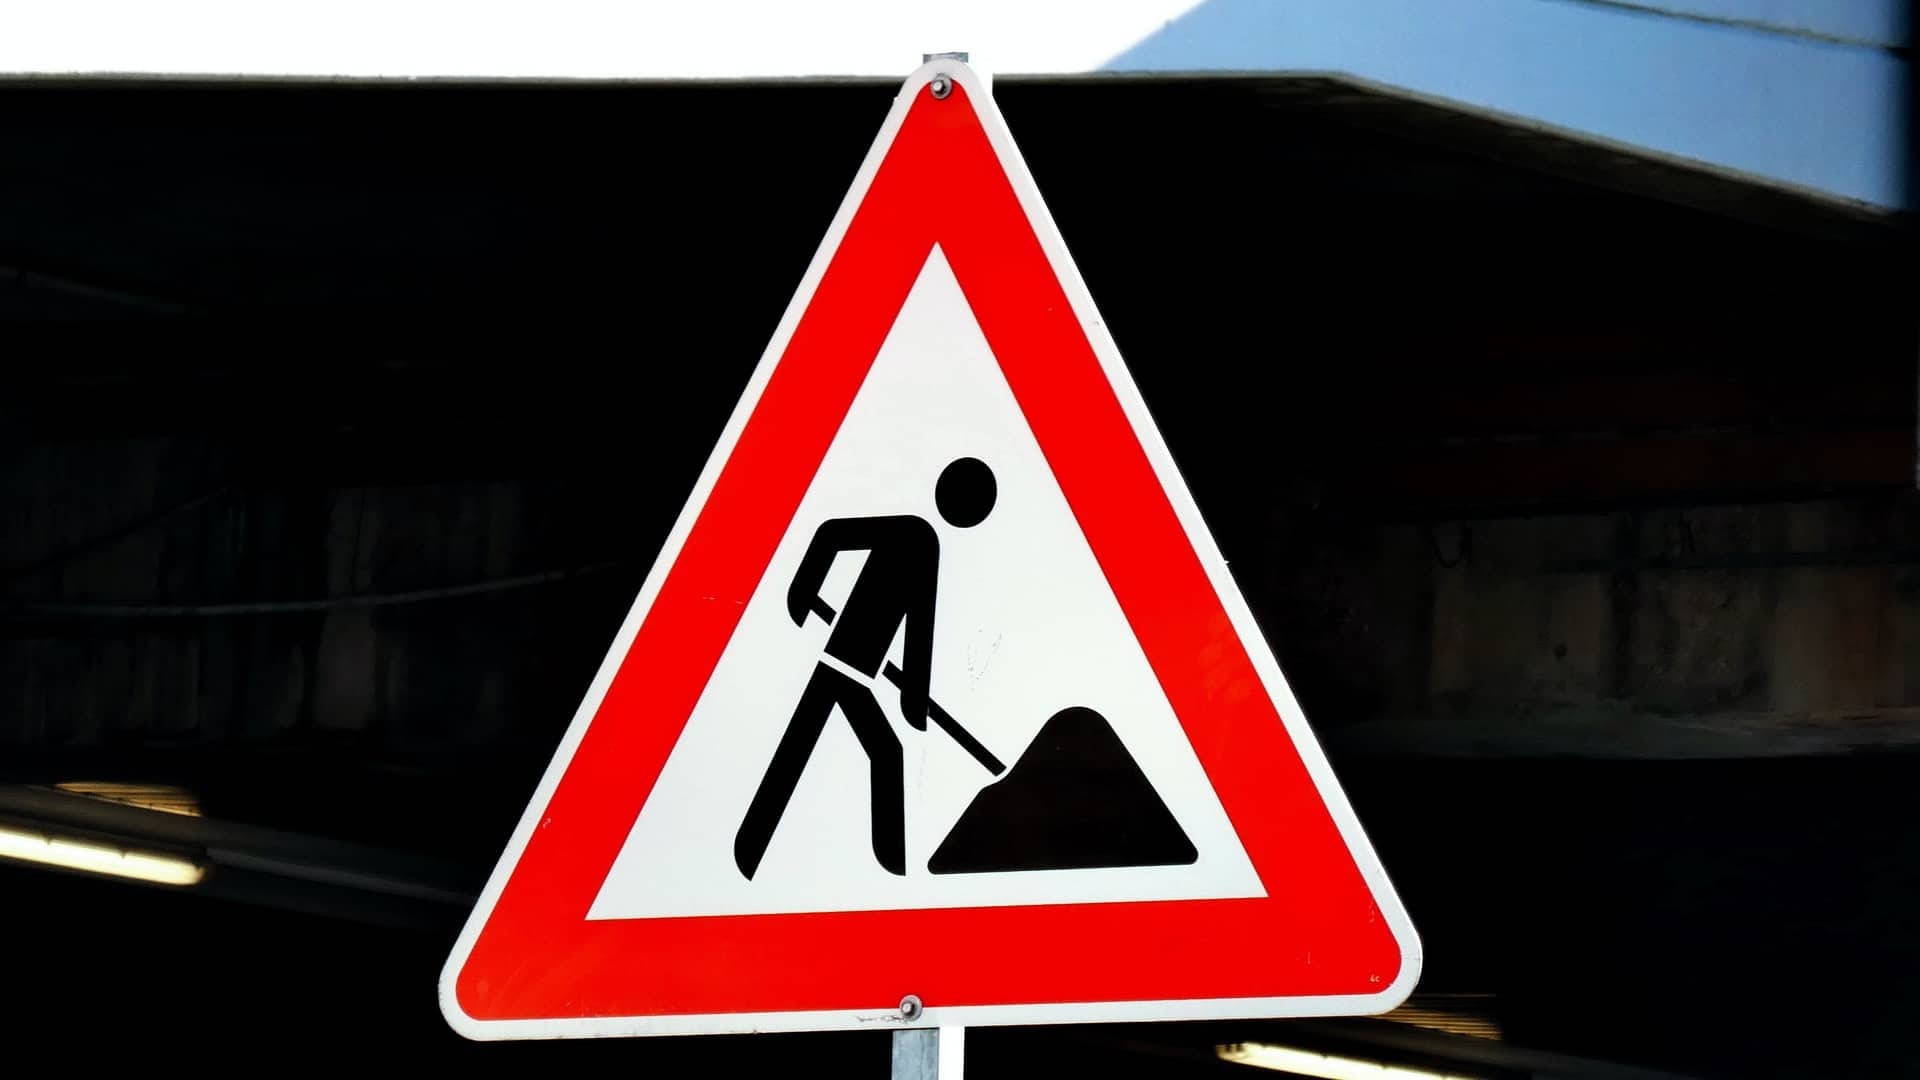